# 统计学：决策的科学项目说明

&emsp;&emsp;说明：[点此](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True)查看此文档的英文版本。

## 背景信息
&emsp;&emsp;在一个 Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“<font color=#FF0000>红色</font>”、“<font color=#0000FF>蓝色</font>”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“<font color=#008000>紫色</font>”、“<font color=#8B0A50>橙色</font>”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。


## 调查问题
&emsp;&emsp;作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。


---
&emsp;&emsp;**1.** 我们的自变量是什么？因变量是什么？

**答：a) 自变量是不同项目参与者。b) 因变量为参与者完成任务使用的时间。
<或者a) 自变量是文字条件。b) 因变量为参与者完成任务使用的平均时间。>**

---
&emsp;&emsp;**2.** 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

&emsp;&emsp;现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

**答：**

&emsp;&emsp;**a)** 此任务是检验Stroop效应，为了说明Stroop效应问题，所以该任务假设集合为${I, II, III}$，其中$I, II, III$如下
$$I \ \ \ \ H_0:{\mu}_1 < {\mu}_2 \ \ \ \ vs\ \ \ \ H_1:\mu_1 \ge \mu_2\tag{1}$$
$$I \ \ \ \ H_0:{\mu}_1 > {\mu}_2 \ \ \ \ vs\ \ \ \ H_1:\mu_1 \le \mu_2\tag{2}$$
$$I \ \ \ \ H_0:{\mu}_1 = {\mu}_2 \ \ \ \ vs\ \ \ \ H_1:\mu_1 \neq \mu_2\tag{3}$$

其中（以假设检验问题$I$为例），命题$ H_0:{\mu}_1 < {\mu}_2$为零假设，$H_1:\mu_1 \ge \mu_2$为对立假设， $\mu_1$为一致文字条件下所有参与者完成任务使用时间的均值， $\mu_2$为不一致文字条件下所有参与者完成任务使用时间的均值。不妨采用假设检验问题$I$，验证Stroop效应问题。

&emsp;&emsp;**b)** 该问题是成对数据的均值假设检验问题，因此我采用$t$检验方法（假设两样本的方差相等）来讨论该问题。问题为检验 $\mu_1,\mu_2$存在显著差异，不妨设显著水平$\alpha=0.05$。

&emsp;&emsp;**3.** 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

data = pd.read_csv("stroopdata.csv")
display(data.head())

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


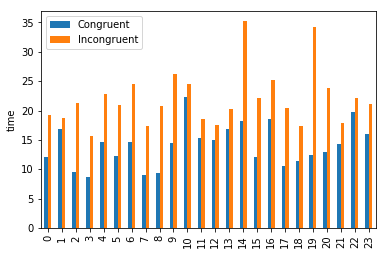

In [5]:
data.plot.bar()

plt.ylabel("time")
plt.show()

In [8]:
congruent_describe = data['Congruent'].describe()
display(congruent_describe)

incongruent_mean = data['Incongruent'].describe()
display(incongruent_mean)

count    24.000000
mean     14.051125
std       3.559358
min       8.630000
25%      11.895250
50%      14.356500
75%      16.200750
max      22.328000
Name: Congruent, dtype: float64

count    24.000000
mean     22.015917
std       4.797057
min      15.687000
25%      18.716750
50%      21.017500
75%      24.051500
max      35.255000
Name: Incongruent, dtype: float64

&emsp;&emsp;**4.** 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

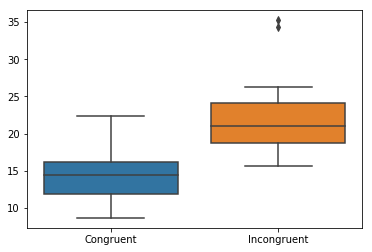

In [4]:
import seaborn as sns

sns.boxplot(data=data)

**答：**
1. 从上图一致性文字条件和非一致性文字条件下参与者的使用时间柱状图可知，非一致性文字条件下参与者使用的时间明显更多。
2. 从以上箱式图可知，一致性文字条件下参与者使用的时间的最大最小值相差较大，且中位数比非一致性文字条件下的小。非一致性条件下，参与者使用的时间存在两个35秒附近的异常值。

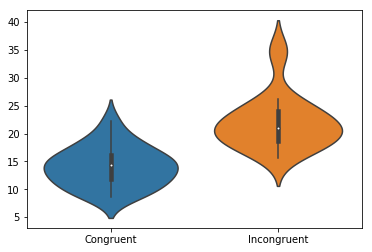

In [5]:
sns.violinplot(data=data)

分析：由小提琴图可以看出，一致性条件下，参与者使用的时间更密集，非一致条件下参与者使用的时间分布更离散。

&emsp;&emsp;**5.** 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

**解答：** 根据3中计算出的方差，两条件下的方差相差不大，可认为近似相等，因此可采用两正态总体均值的t检验。对上述假设检验问题I进行检验，步骤如下：

&emsp;&emsp;**1)** 构造统计量
$$t = \frac {(\overline{x}-\overline{y})}{s_w\sqrt{\frac1m+\frac1n}}=\frac {(\overline{x}-\overline{y})}{s_w\sqrt{\frac2n}}$$
（这里样本量$m=n=24$），$\overline x$为一致性文字条件下时间的均值，$\overline y$为非一致性文字条件下时间的均值。
$$s_w = \frac1{m+n-2}\left[ \sum_{i=1}^{m}(x_i-\overline x)^2 + \sum_{i=1}^{n}(y_i-\overline y)^2 \right]$$

拒绝域为$t≥t_{1-\alpha} (m+n-2)$

&emsp;&emsp;**2)** 根据数据计算得，$\overline x$=14.051125，$\overline y$=22.015917, $s_w$=17.84039305
t=-5.357365374.
若显著水平 ，$t_{1-\alpha}=t_{0.975}(46)$)= 2.021，$t=-5.357365374 \lt 2.021$, 因此不应拒绝原假设。即是原假设$\mu_1 \lt \mu_2$在显著水平$\alpha=0.05$上成立。与期望的一致。


&emsp;&emsp;**6.** 可选：你觉得导致所观察到的效应的原因是什么？你是否能想到会取得类似效应的替代或类似任务？进行一些调查研究将有助于你思考这两个问题！

**解答：**

&emsp;&emsp;**a)** 这可能和人的专注度、阅读反应能力和颜色的识别能力的不同、受试者的年龄等因素影响的结果。

&emsp;&emsp;**b)** 替代任务如：实验组要求被试者看见太阳的图形时说“夜晚”,看见月亮的图形时说“白天”;控制组要求被试看见一个抽象的图形时说“白天”,看见另一个抽象图形时说“夜晚”。
